<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Montecarlo_Media_Muestral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLICACIÓN ANALÍTICA

Se desea calcular la integral $\int_a^b g(x)dx$ para una función $g(x)$, la cual puede NO tener solución analítica, por lo tanto, se recurre a métodos numéricos para aproximar el resultado de la integral.  
Consideremos lo siguiente:
$$I=\int_a^bg(x)dx=\int_a^bw(x)f(x)dx$$
donde
$$w(x)=g(x)(b-a) \hspace{5mm}y \hspace{5mm} f(x)=\frac{1}{b-a}$$

De modo que $E(g(x))=\frac{I}{b-a}$ con $x \sim U(1,b)$

Se generan $n$ puntos aleatorios $x_1,x_2,...,x_n$ con $x_i \sim U(a,b)$  
  Posteriormente  se evalua $g(x)$, es decir, se tiene
  $$g(x_1),g(x_2),...,g(x_n)$$

Para un $n$ suficientemente grande y por la Ley de los Grandes Números
$$\frac{1}{n} \sum_{i=1}^n g(x_i) \rightarrow E(g(x))=\frac{I}{b-a}$$

Se tiene luego $\;\;E(g(x))=\frac{I}{b-a} \hspace{5mm} ⇒ \hspace{5mm} I=(b-a)E(g(x))$  

Por lo tanto, se tiene el estimador insesgado $$\theta_1=(b-a)\frac{1}{n}\sum_{i=1}^ng(x)\approx(b-a)E(g(x))= I$$

In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def g(x):       #Esta función calcula las funciones gi(x) y las guarad en una lista
  g_i=np.sqrt(np.arctan(x))
  return g_i

In [3]:
def exp(n,a,b):
  Ui=np.random.uniform(0, 1, n)       #Genera n variables ~ U(0,1)
  Xi=a+Ui*(b-a)                       #Calcula lista de Xi
  g_i=g(Xi)                           #Calcula lista de g(Xi)
  I=(b-a)/n*np.sum(g_i)               #Calcula aproximación

  return I

In [9]:
def histograma(aprox):                                  #Esta función imprime la estimación y el histograma
  plt.hist(aprox, bins=25, color='green', alpha=0.7)
  plt.title('1000 experimentos de 50 iteraciones')
  plt.axvline(np.mean(aprox),label='Media')
  plt.axvline(np.mean(aprox)-np.std(aprox),label='Intervalo de confianza', color='red')
  plt.axvline(np.mean(aprox)+np.std(aprox), color='red')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación (Media): ', np.mean(aprox))
  print('Intervalo de confianza: [', np.mean(aprox)-np.std(aprox),np.mean(aprox)+np.std(aprox),']' )
  return

Estimación (Media):  0.6319328035434559
Intervalo de confianza: [ 0.6025676942888311 0.6612979127980808 ]


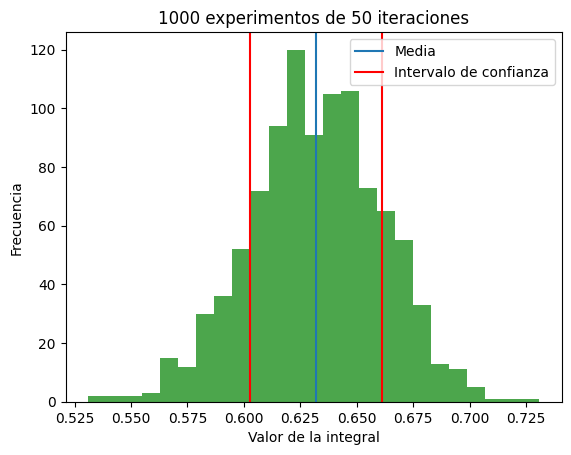

In [12]:
#Simulacion

#Parametros
m=1000        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral

aprox=[]
for i in range(m):
  aprox.append(exp(n,a,b))

histograma(aprox)